# DBSCAN - Schritt für Schritt
### Der Algorithmus:
Link: https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/

1. Punkt auswählen: Nimm einen noch nicht besuchten Punkt P
2. Nachbarn finden: Suche alle Punkte im Radius eps um P
3. Punkt klassifizieren:
    - ≥ min_samples Nachbarn? → P ist Core-Punkt → Starte neuen Cluster
    - < min_samples Nachbarn? → P wird erstmal als Noise markiert
4. Cluster erweitern (wenn P Core-Punkt ist):
    - Füge alle Nachbarn zum Cluster hinzu
    - Prüfe jeden Nachbarn: Ist er auch Core-Punkt? → Erweitere Cluster weiter
    - Nachbar ist kein Core-Punkt? → Er wird Border-Punkt
5. Wiederholen bis alle Punkte besucht wurden
6. Übrige Punkte bleiben als Noise (Ausreißer)

eps: Maximaler Abstand zwischen zwei Punkten, um als Nachbarn zu gelten

min_samples: Minimale Anzahl Punkte in einer Nachbarschaft für Core-Point

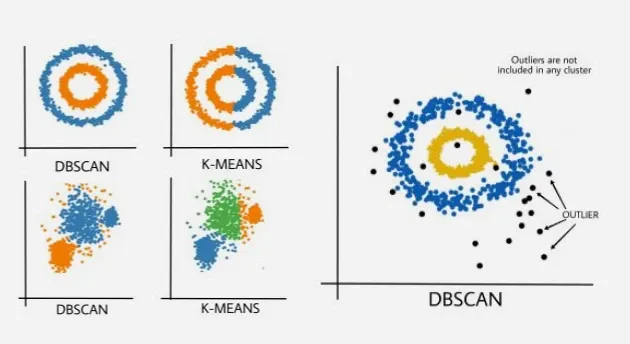

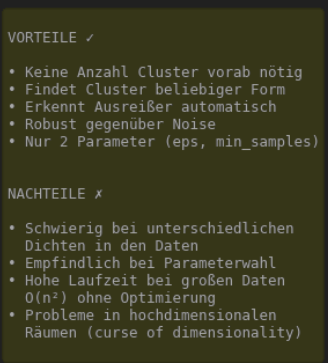

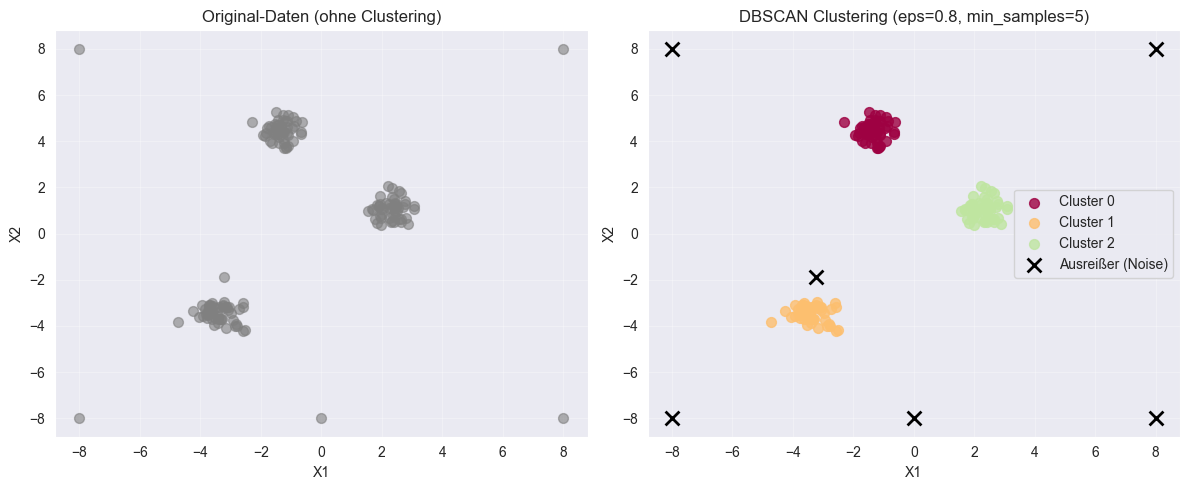

DBSCAN Clustering Ergebnisse

Parameter:
  - eps (Nachbarschaftsradius): 0.8
  - min_samples (Min. Punkte): 5

Anzahl gefundener Cluster: 3
Anzahl Ausreißer (Noise): 6
Anzahl Core-Samples: 148

Punkte pro Cluster:
  Ausreißer: 6 Punkte
  Cluster 0: 50 Punkte
  Cluster 1: 49 Punkte
  Cluster 2: 50 Punkte

Funktionsweise von DBSCAN:

1. CORE-PUNKTE: Punkte mit >= min_samples Nachbarn im Radius eps
2. BORDER-PUNKTE: Nicht-Core-Punkte, die in der Nachbarschaft
                   eines Core-Punkts liegen
3. NOISE-PUNKTE: Alle anderen Punkte (als Ausreißer markiert mit -1)

DBSCAN verbindet Core-Punkte zu Clustern, wenn sie sich innerhalb
des eps-Radius befinden (dichte-basiertes Clustering).



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Erstelle Beispieldaten: 3 klar getrennte Cluster + einige Ausreißer
# Hauptcluster
X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.4,
                  center_box=(-5, 5), random_state=42)

# Füge einige Ausreißer hinzu (Noise-Punkte)
outliers = np.array([[-8, -8], [8, 8], [-8, 8], [8, -8], [0, -8]])
X = np.vstack([X, outliers])

# DBSCAN Clustering
# eps: Maximaler Abstand zwischen zwei Punkten, um als Nachbarn zu gelten
# min_samples: Minimale Anzahl Punkte in einer Nachbarschaft für Core-Point
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualisierung
plt.figure(figsize=(12, 5))

# Plot 1: Alle Punkte ohne Clustering
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50, alpha=0.6)
plt.title('Original-Daten (ohne Clustering)', fontsize=12)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)

# Plot 2: DBSCAN Ergebnis
plt.subplot(1, 2, 2)

# Eindeutige Labels (Cluster)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise-Punkte (Ausreißer) in schwarz
        class_member_mask = (labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c='black', marker='x',
                   s=100, label='Ausreißer (Noise)', linewidths=2)
    else:
        # Cluster-Punkte
        class_member_mask = (labels == label)
        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[color], s=50,
                   label=f'Cluster {label}', alpha=0.8)

plt.title(f'DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})',
          fontsize=12)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dbscan_beispiel.png', dpi=150, bbox_inches='tight')
plt.show()

# Ausgabe der Ergebnisse
print("="*60)
print("DBSCAN Clustering Ergebnisse")
print("="*60)
print(f"\nParameter:")
print(f"  - eps (Nachbarschaftsradius): {dbscan.eps}")
print(f"  - min_samples (Min. Punkte): {dbscan.min_samples}")
print(f"\nAnzahl gefundener Cluster: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Anzahl Ausreißer (Noise): {list(labels).count(-1)}")
print(f"Anzahl Core-Samples: {len(dbscan.core_sample_indices_)}")

# Zeige die Verteilung der Punkte pro Cluster
print("\nPunkte pro Cluster:")
for label in sorted(set(labels)):
    count = list(labels).count(label)
    if label == -1:
        print(f"  Ausreißer: {count} Punkte")
    else:
        print(f"  Cluster {label}: {count} Punkte")

print("\n" + "="*60)
print("Funktionsweise von DBSCAN:")
print("="*60)
print("""
1. CORE-PUNKTE: Punkte mit >= min_samples Nachbarn im Radius eps
2. BORDER-PUNKTE: Nicht-Core-Punkte, die in der Nachbarschaft
                   eines Core-Punkts liegen
3. NOISE-PUNKTE: Alle anderen Punkte (als Ausreißer markiert mit -1)

DBSCAN verbindet Core-Punkte zu Clustern, wenn sie sich innerhalb
des eps-Radius befinden (dichte-basiertes Clustering).
""")

C:\Users\nicol\AppData\Local\Temp\ipykernel_25212\3641630807.py:115: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xy[:, 0], xy[:, 1], c=col, s=size, marker=marker,


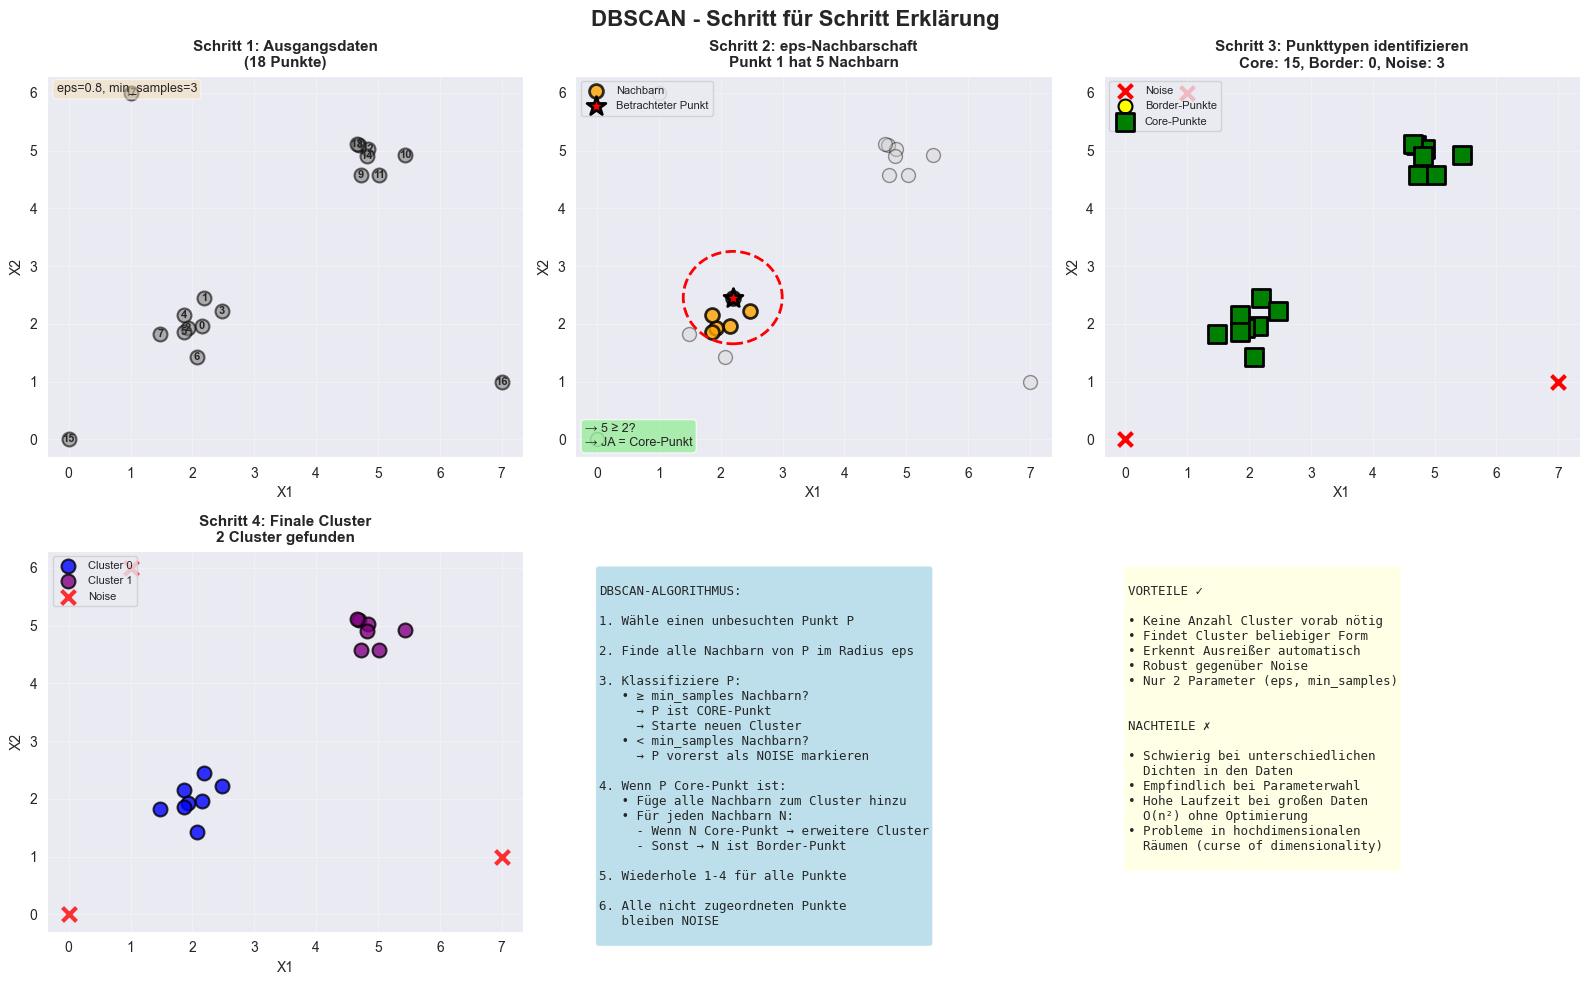

DBSCAN - Detaillierte Erklärung

Parameter: eps=0.8, min_samples=3

Ergebnis:
  - Core-Punkte:   15
  - Border-Punkte: 0
  - Noise-Punkte:  3
  - Cluster:       2

KERNKONZEPTE:

1. CORE-PUNKT (Kernpunkt):
   - Hat mindestens 'min_samples' Nachbarn im Radius 'eps'
   - Bildet das Rückgrat eines Clusters
   - Kann neue Punkte zum Cluster hinzufügen

2. BORDER-PUNKT (Randpunkt):
   - Hat weniger als 'min_samples' Nachbarn
   - Liegt aber in der Nachbarschaft eines Core-Punkts
   - Gehört zum Cluster, kann ihn aber nicht erweitern

3. NOISE-PUNKT (Ausreißer):
   - Hat weniger als 'min_samples' Nachbarn
   - Liegt nicht in der Nachbarschaft eines Core-Punkts
   - Wird als Ausreißer markiert (Label = -1)

4. DICHTE-ERREICHBARKEIT:
   - Zwei Core-Punkte im gleichen Cluster sind dichte-erreichbar
   - D.h. man kann über andere Core-Punkte von einem zum anderen gelangen
   - Dies bildet zusammenhängende Cluster



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib.patches import Circle

# Einfacher Beispieldatensatz für bessere Nachvollziehbarkeit
np.random.seed(42)
# Zwei kleine Cluster
cluster1 = np.random.randn(8, 2) * 0.3 + [2, 2]
cluster2 = np.random.randn(7, 2) * 0.3 + [5, 5]
# Einige Ausreißer
noise = np.array([[0, 0], [7, 1], [1, 6]])
X = np.vstack([cluster1, cluster2, noise])

# DBSCAN Parameter
eps = 0.8
min_samples = 3

# DBSCAN ausführen
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Visualisierung der Schritte
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('DBSCAN - Schritt für Schritt Erklärung', fontsize=16, fontweight='bold')

# Schritt 1: Originaldaten
ax = axes[0, 0]
ax.scatter(X[:, 0], X[:, 1], c='gray', s=100, alpha=0.6, edgecolors='black', linewidth=1.5)
for i, (x, y) in enumerate(X):
    ax.annotate(f'{i}', (x, y), fontsize=8, ha='center', va='center', fontweight='bold')
ax.set_title('Schritt 1: Ausgangsdaten\n(18 Punkte)', fontsize=11, fontweight='bold')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid(True, alpha=0.3)
ax.text(0.02, 0.98, f'eps={eps}, min_samples={min_samples}',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Schritt 2: eps-Nachbarschaft eines Punktes zeigen
ax = axes[0, 1]
sample_point_idx = 1
sample_point = X[sample_point_idx]
# Berechne Distanzen
distances = np.sqrt(np.sum((X - sample_point)**2, axis=1))
neighbors = distances <= eps

ax.scatter(X[:, 0], X[:, 1], c='lightgray', s=100, alpha=0.4, edgecolors='black', linewidth=1)
ax.scatter(X[neighbors, 0], X[neighbors, 1], c='orange', s=100, alpha=0.8,
          edgecolors='black', linewidth=2, label='Nachbarn')
ax.scatter([sample_point[0]], [sample_point[1]], c='red', s=200, marker='*',
          edgecolors='black', linewidth=2, label='Betrachteter Punkt', zorder=5)

# eps-Radius zeichnen
circle = Circle(sample_point, eps, color='red', fill=False, linewidth=2, linestyle='--')
ax.add_patch(circle)

neighbor_count = np.sum(neighbors) - 1  # -1 weil Punkt sich selbst nicht zählt
ax.set_title(f'Schritt 2: eps-Nachbarschaft\nPunkt {sample_point_idx} hat {neighbor_count} Nachbarn',
            fontsize=11, fontweight='bold')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc='upper left', fontsize=8)
ax.grid(True, alpha=0.3)
ax.text(0.02, 0.02, f'→ {neighbor_count} ≥ {min_samples-1}?\n→ JA = Core-Punkt',
        transform=ax.transAxes, fontsize=9, verticalalignment='bottom',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Schritt 3: Core-, Border- und Noise-Punkte identifizieren
ax = axes[0, 2]
# Bestimme Punkttypen
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

core_points = core_samples_mask
border_points = (labels != -1) & ~core_samples_mask
noise_points = labels == -1

ax.scatter(X[noise_points, 0], X[noise_points, 1], c='red', s=100, marker='x',
          linewidth=3, label='Noise', zorder=3)
ax.scatter(X[border_points, 0], X[border_points, 1], c='yellow', s=100,
          edgecolors='black', linewidth=1.5, label='Border-Punkte', zorder=2)
ax.scatter(X[core_points, 0], X[core_points, 1], c='green', s=150,
          edgecolors='black', linewidth=2, label='Core-Punkte', zorder=1, marker='s')

ax.set_title(f'Schritt 3: Punkttypen identifizieren\nCore: {np.sum(core_points)}, '
            f'Border: {np.sum(border_points)}, Noise: {np.sum(noise_points)}',
            fontsize=11, fontweight='bold')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc='upper left', fontsize=8)
ax.grid(True, alpha=0.3)

# Schritt 4: Cluster bilden
ax = axes[1, 0]
unique_labels = set(labels)
colors = ['blue', 'purple', 'cyan', 'magenta']

for label in unique_labels:
    if label == -1:
        col = 'red'
        marker = 'x'
        size = 100
        lw = 3
        label_text = 'Noise'
    else:
        col = colors[label % len(colors)]
        marker = 'o'
        size = 100
        lw = 1.5
        label_text = f'Cluster {label}'

    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    ax.scatter(xy[:, 0], xy[:, 1], c=col, s=size, marker=marker,
              edgecolors='black', linewidth=lw, label=label_text, alpha=0.8)

ax.set_title(f'Schritt 4: Finale Cluster\n{len(set(labels)) - (1 if -1 in labels else 0)} Cluster gefunden',
            fontsize=11, fontweight='bold')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc='upper left', fontsize=8)
ax.grid(True, alpha=0.3)

# Schritt 5: Algorithmus-Ablauf als Text
ax = axes[1, 1]
ax.axis('off')
algorithm_text = """
DBSCAN-ALGORITHMUS:

1. Wähle einen unbesuchten Punkt P

2. Finde alle Nachbarn von P im Radius eps

3. Klassifiziere P:
   • ≥ min_samples Nachbarn?
     → P ist CORE-Punkt
     → Starte neuen Cluster
   • < min_samples Nachbarn?
     → P vorerst als NOISE markieren

4. Wenn P Core-Punkt ist:
   • Füge alle Nachbarn zum Cluster hinzu
   • Für jeden Nachbarn N:
     - Wenn N Core-Punkt → erweitere Cluster
     - Sonst → N ist Border-Punkt

5. Wiederhole 1-4 für alle Punkte

6. Alle nicht zugeordneten Punkte
   bleiben NOISE
"""
ax.text(0.05, 0.95, algorithm_text, transform=ax.transAxes,
       fontsize=9, verticalalignment='top', family='monospace',
       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Schritt 6: Vor- und Nachteile
ax = axes[1, 2]
ax.axis('off')
pros_cons_text = """
VORTEILE ✓

• Keine Anzahl Cluster vorab nötig
• Findet Cluster beliebiger Form
• Erkennt Ausreißer automatisch
• Robust gegenüber Noise
• Nur 2 Parameter (eps, min_samples)


NACHTEILE ✗

• Schwierig bei unterschiedlichen
  Dichten in den Daten
• Empfindlich bei Parameterwahl
• Hohe Laufzeit bei großen Daten
  O(n²) ohne Optimierung
• Probleme in hochdimensionalen
  Räumen (curse of dimensionality)
"""
ax.text(0.05, 0.95, pros_cons_text, transform=ax.transAxes,
       fontsize=9, verticalalignment='top', family='monospace',
       bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.savefig('dbscan_erklaerung.png', dpi=150, bbox_inches='tight')
plt.show()

print("="*70)
print("DBSCAN - Detaillierte Erklärung")
print("="*70)
print(f"\nParameter: eps={eps}, min_samples={min_samples}")
print(f"\nErgebnis:")
print(f"  - Core-Punkte:   {np.sum(core_samples_mask)}")
print(f"  - Border-Punkte: {np.sum(border_points)}")
print(f"  - Noise-Punkte:  {np.sum(noise_points)}")
print(f"  - Cluster:       {len(set(labels)) - (1 if -1 in labels else 0)}")

print("\n" + "="*70)
print("KERNKONZEPTE:")
print("="*70)
print("""
1. CORE-PUNKT (Kernpunkt):
   - Hat mindestens 'min_samples' Nachbarn im Radius 'eps'
   - Bildet das Rückgrat eines Clusters
   - Kann neue Punkte zum Cluster hinzufügen

2. BORDER-PUNKT (Randpunkt):
   - Hat weniger als 'min_samples' Nachbarn
   - Liegt aber in der Nachbarschaft eines Core-Punkts
   - Gehört zum Cluster, kann ihn aber nicht erweitern

3. NOISE-PUNKT (Ausreißer):
   - Hat weniger als 'min_samples' Nachbarn
   - Liegt nicht in der Nachbarschaft eines Core-Punkts
   - Wird als Ausreißer markiert (Label = -1)

4. DICHTE-ERREICHBARKEIT:
   - Zwei Core-Punkte im gleichen Cluster sind dichte-erreichbar
   - D.h. man kann über andere Core-Punkte von einem zum anderen gelangen
   - Dies bildet zusammenhängende Cluster
""")